In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
from google.colab import files
uploaded = files.upload()


In [ ]:
df = pd.read_csv('/content/ai_job_market_insights.csv')
df.head()

In [ ]:
df

In [ ]:
df.isna().sum()


In [ ]:
df.duplicated().sum()


In [ ]:
df.Job_Title.unique()


In [ ]:
df.Job_Title.value_counts().sort_values(ascending=False)


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Job_Title', data=df, order=df['Job_Title'].value_counts().index, palette='pastel')

plt.title('Count of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')

plt.show()

In [ ]:
df.Industry.unique()


In [ ]:
df.Industry.value_counts().sort_values(ascending=False)


In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Industry', data=df, order=df['Industry'].value_counts().index, palette='pastel')

plt.title('Count of Industry')
plt.xlabel('Count')
plt.ylabel('Industry')

plt.show()

In [ ]:
df.Company_Size.unique()


In [ ]:
colors = plt.get_cmap('Pastel1').colors
df["Company_Size"].value_counts().plot(kind='pie', startangle=20 ,autopct='%1.1f%%', figsize=(8,8), title='Distribution of  company size', explode=(0.08,0,0 ) , shadow=True , colors=colors)
plt.show()

In [ ]:
df.groupby("Company_Size")["Job_Title"].value_counts().unstack()


Job_Title,AI Researcher,Cybersecurity Analyst,Data Scientist,HR Manager,Marketing Specialist,Operations Manager,Product Manager,Sales Manager,Software Engineer,UX Designer
Company_Size,,,,,,,,,,
Large,16,20,23,20,15,13,16,16,12,15
Medium,21,16,17,20,20,12,11,16,13,17
Small,14,19,22,17,13,19,12,17,16,22


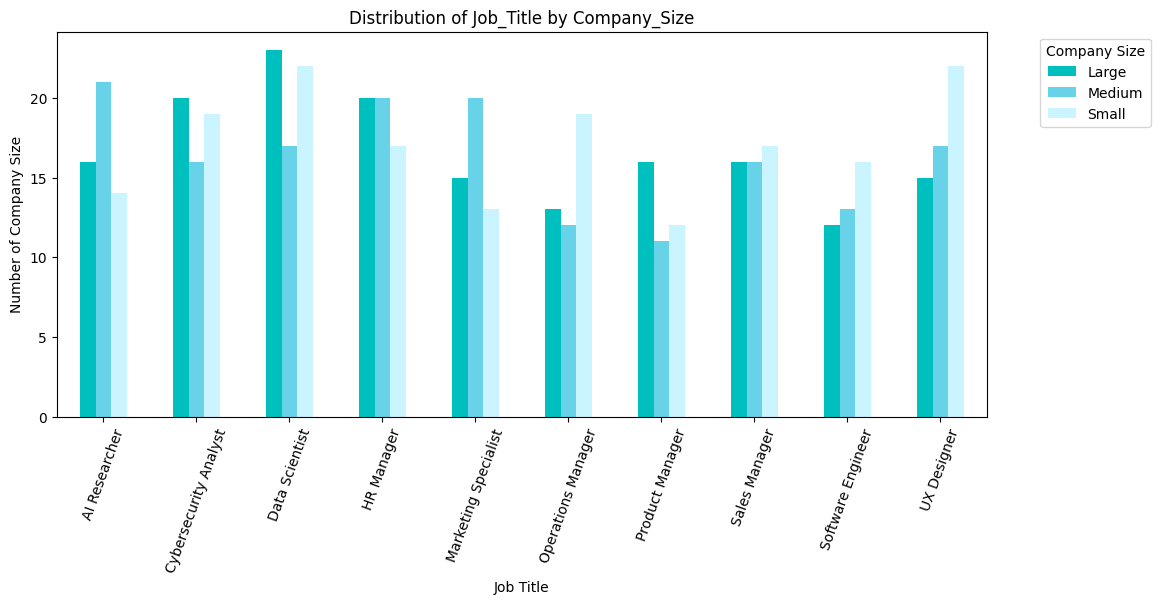

In [ ]:
subject_counts = df.groupby(["Job_Title", "Company_Size"]).size().unstack()

palette = sns.color_palette("Pastel1")
subject_counts.plot(kind='bar', figsize=(12, 5), color=["c",'#68D2E8' ,"#CAF4FF" ])

plt.title('Distribution of Job_Title by Company_Size')
plt.xlabel('Job Title')
plt.ylabel('Number of Company Size')
plt.xticks(rotation=70)
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

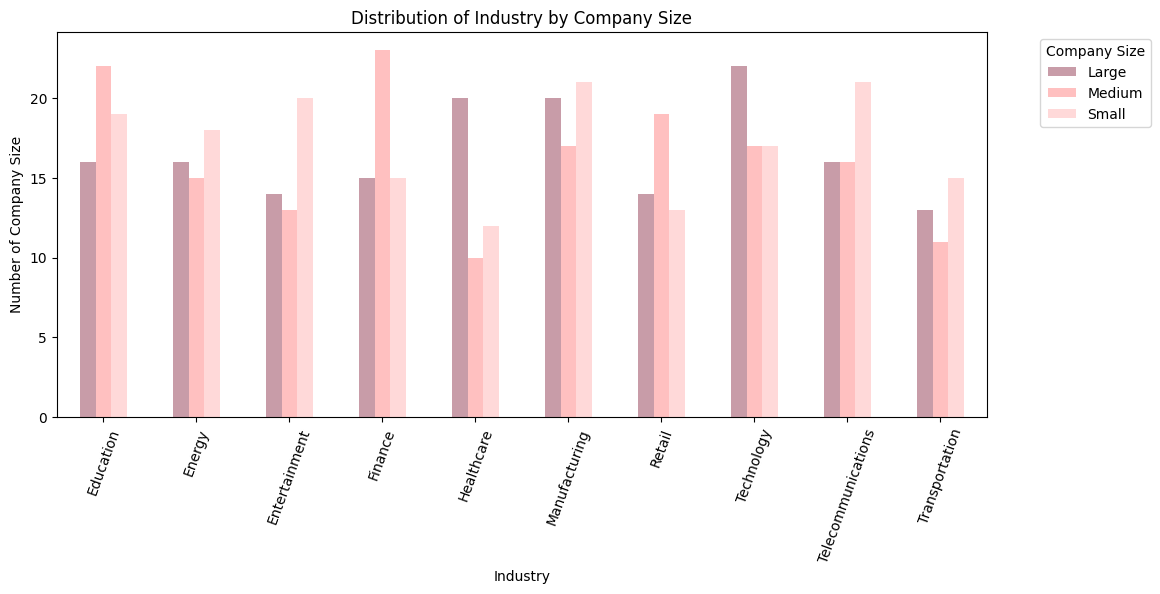

In [ ]:
subject_counts = df.groupby(["Industry", "Company_Size"]).size().unstack()

palette = sns.color_palette("Set1")
subject_counts.plot(kind='bar', figsize=(12, 5), color=["#BB8493","#FFB1B1","#FFD0D0" ] ,alpha=0.8)

plt.title('Distribution of Industry by Company Size')
plt.xlabel('Industry')
plt.ylabel('Number of Company Size')
plt.xticks(rotation=70)
plt.legend(title='Company Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
df.Location.unique()


array(['Dubai', 'Singapore', 'Berlin', 'Tokyo', 'San Francisco', 'London',
       'Paris', 'Sydney', 'New York', 'Toronto'], dtype=object)

In [ ]:
df.groupby("Company_Size")["Location"].value_counts().unstack()


Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Company_Size,,,,,,,,,,
Large,18,13,14,19,15,18,17,14,19,19
Medium,19,17,15,11,14,19,20,20,14,14
Small,11,21,17,19,17,25,17,18,18,8


In [ ]:
df.groupby("Job_Title")["Location"].value_counts().unstack()


Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Job_Title,,,,,,,,,,
AI Researcher,2,3,3,6,2,10,8,5,5,7
Cybersecurity Analyst,7,9,8,6,4,4,3,7,3,4
Data Scientist,7,6,5,8,4,6,5,8,8,5
HR Manager,5,4,8,6,8,7,6,3,5,5
Marketing Specialist,6,5,4,2,6,9,6,3,6,1
Operations Manager,7,6,5,4,2,7,4,4,4,1
Product Manager,4,2,3,2,4,6,3,5,5,5
Sales Manager,5,3,6,3,5,5,7,5,3,7
Software Engineer,2,5,3,5,4,3,6,6,5,2


In [ ]:
df.groupby("Industry")["Location"].value_counts().unstack()


Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Industry,,,,,,,,,,
Education,6,4,6,7,5,6,6,5,7,5
Energy,6,5,3,6,3,6,9,4,3,4
Entertainment,6,3,3,5,4,3,9,5,7,2
Finance,1,4,4,3,5,12,6,3,8,7
Healthcare,5,7,4,1,9,4,2,6,3,1
Manufacturing,4,5,8,7,8,6,4,8,6,2
Retail,5,5,4,5,2,6,3,7,5,4
Technology,5,5,5,6,4,8,7,5,5,6
Telecommunications,8,7,6,7,1,5,3,6,5,5


In [ ]:
df.AI_Adoption_Level.unique()


array(['Medium', 'Low', 'High'], dtype=object)

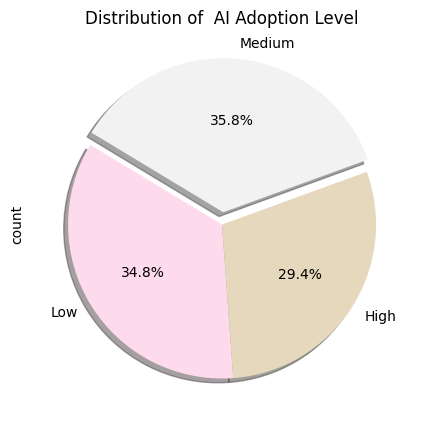

In [ ]:
colors = plt.get_cmap('Pastel1_r').colors
df["AI_Adoption_Level"].value_counts().plot(kind='pie', startangle=20 ,autopct='%1.1f%%', figsize=(5,5), title='Distribution of  AI Adoption Level', explode=(0.08,0,0 ) , shadow=True , colors=colors)
plt.show()

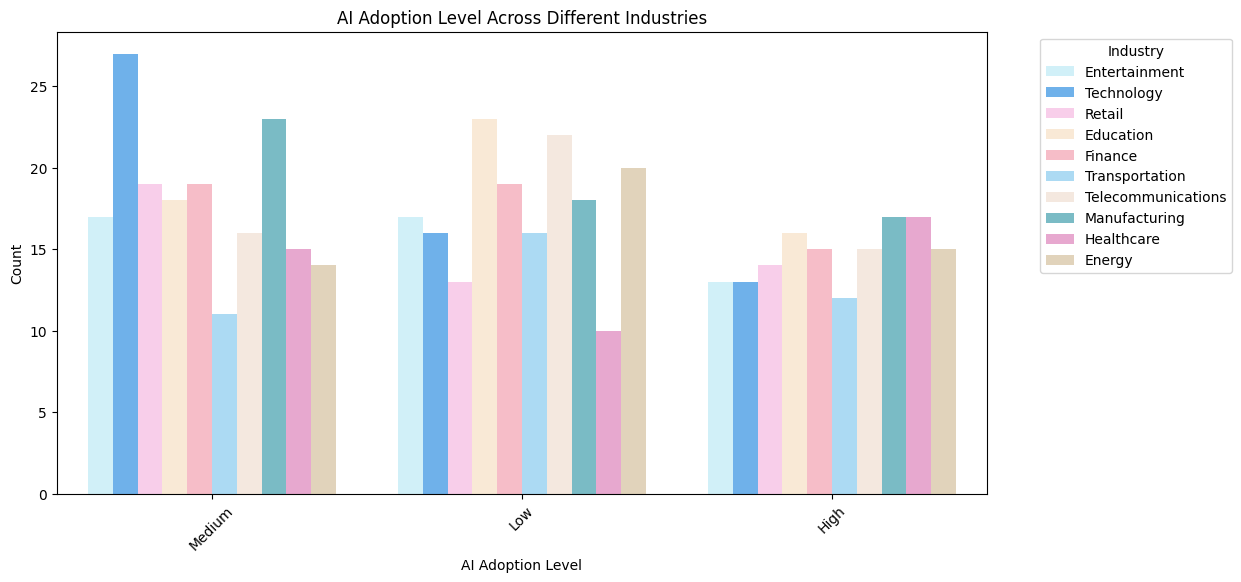

In [ ]:
colors = ["#CAF4FF", "#5AB2FF","#FFC7ED" ,"#FFE9D0" ,"#FFB4C2","#A0DEFF" ,"#F7E7DC" ,"#6DC5D1" ,"#F19ED2","#E7D4B5"]

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AI_Adoption_Level', hue='Industry', palette=colors)
plt.title('AI Adoption Level Across Different Industries')
plt.xlabel('AI Adoption Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
colors = ["#CAF4FF", "#5AB2FF","#FFC7ED" ,"#FFE9D0" ,"#FFB4C2","#A0DEFF" ,"#F7E7DC" ,"#6DC5D1" ,"#F19ED2","#E7D4B5"]

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='AI_Adoption_Level', hue='Job_Title', palette=colors)
plt.title('AI Adoption Level Across Different Job Title')
plt.xlabel('AI Adoption Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

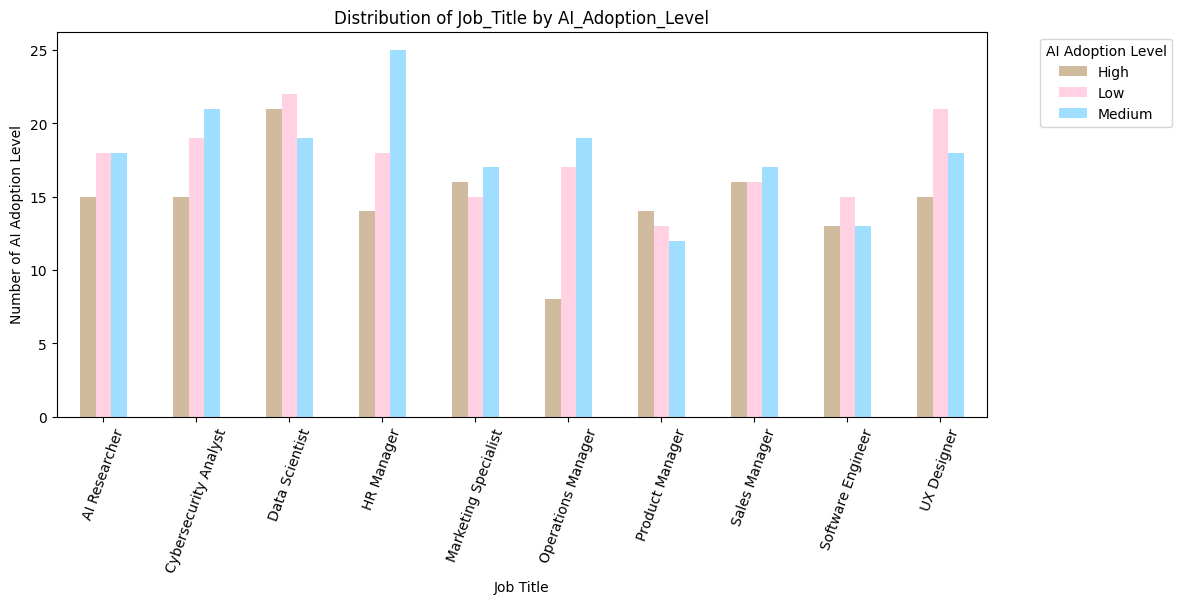

In [ ]:
subject_counts = df.groupby(["Job_Title", "AI_Adoption_Level"]).size().unstack()

palette = sns.color_palette("Pastel1")
subject_counts.plot(kind='bar', figsize=(12, 5), color=[ "#D1BB9E", "#FFD1E3", "#A0DEFF"])

plt.title('Distribution of Job_Title by AI_Adoption_Level')
plt.xlabel('Job Title')
plt.ylabel('Number of AI Adoption Level')
plt.xticks(rotation=70)
plt.legend(title='AI Adoption Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

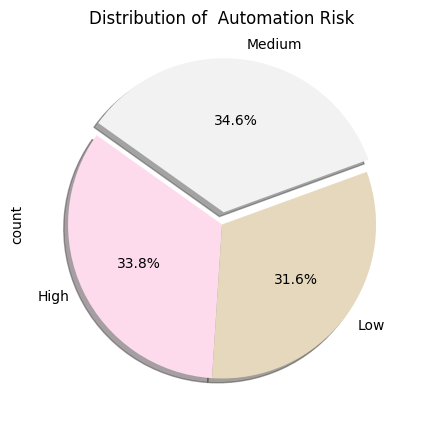

In [ ]:
colors = plt.get_cmap('Pastel1_r').colors
df["Automation_Risk"].value_counts().plot(kind='pie', startangle=20 ,autopct='%1.1f%%', figsize=(5,5), title='Distribution of  Automation Risk', explode=(0.08,0,0 ) , shadow=True , colors=colors)
plt.show()

In [ ]:
df.groupby(["Automation_Risk", "AI_Adoption_Level"]).size().unstack()


AI_Adoption_Level,High,Low,Medium
Automation_Risk,,,
High,48,53,68
Low,43,61,54
Medium,56,60,57


In [ ]:
df.groupby(["Automation_Risk", "Job_Title"]).size().unstack()


Job_Title,AI Researcher,Cybersecurity Analyst,Data Scientist,HR Manager,Marketing Specialist,Operations Manager,Product Manager,Sales Manager,Software Engineer,UX Designer
Automation_Risk,,,,,,,,,,
High,20,23,17,15,17,10,16,20,15,16
Low,15,21,25,16,10,18,12,18,13,10
Medium,16,11,20,26,21,16,11,11,13,28


In [ ]:
df.groupby(["Automation_Risk", "Industry"]).size().unstack()


Industry,Education,Energy,Entertainment,Finance,Healthcare,Manufacturing,Retail,Technology,Telecommunications,Transportation
Automation_Risk,,,,,,,,,,
High,22,17,18,17,11,19,11,17,18,19
Low,16,18,17,16,14,16,16,17,17,11
Medium,19,14,12,20,17,23,19,22,18,9


In [ ]:
df.groupby(["Automation_Risk", "Location"]).size().unstack()


Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Automation_Risk,,,,,,,,,,
High,12,14,20,17,12,24,23,17,15,15
Low,16,20,17,10,16,17,12,20,15,15
Medium,20,17,9,22,18,21,19,15,21,11


In [ ]:
df.Required_Skills.unique()


array(['UX/UI Design', 'Marketing', 'Project Management', 'JavaScript',
       'Cybersecurity', 'Sales', 'Machine Learning', 'Python',
       'Data Analysis', 'Communication'], dtype=object)

In [ ]:
df.Required_Skills.value_counts()


,count
Required_Skills,
Project Management,60
Python,60
Cybersecurity,58
Machine Learning,52
UX/UI Design,49
Sales,49
Data Analysis,49
Marketing,45
JavaScript,44


In [ ]:
df.groupby(["Required_Skills", "Job_Title"]).size().unstack()


Job_Title,AI Researcher,Cybersecurity Analyst,Data Scientist,HR Manager,Marketing Specialist,Operations Manager,Product Manager,Sales Manager,Software Engineer,UX Designer
Required_Skills,,,,,,,,,,
Communication,4,3,2,4,6,5,2,1,4,3
Cybersecurity,5,10,9,6,3,5,2,8,2,8
Data Analysis,4,3,7,7,4,3,2,9,5,5
JavaScript,9,4,3,5,4,5,5,2,3,4
Machine Learning,2,7,6,10,1,4,7,7,6,2
Marketing,4,5,5,5,8,1,3,2,5,7
Project Management,3,5,7,6,2,5,6,7,5,14
Python,9,5,9,3,10,5,5,6,3,5
Sales,7,4,8,6,6,5,2,4,4,3


In [ ]:
pd.crosstab(index=df['Industry'], columns=[df['Required_Skills']])


Required_Skills,Communication,Cybersecurity,Data Analysis,JavaScript,Machine Learning,Marketing,Project Management,Python,Sales,UX/UI Design
Industry,,,,,,,,,,
Education,5,9,9,4,7,3,10,4,4,2
Energy,2,5,6,4,6,3,3,5,6,9
Entertainment,3,8,2,6,4,7,6,4,4,3
Finance,2,8,2,6,8,1,6,9,5,6
Healthcare,5,2,5,5,5,3,4,8,2,3
Manufacturing,7,7,4,3,6,8,8,8,4,3
Retail,3,9,5,5,6,3,5,3,2,5
Technology,1,4,5,5,4,10,4,6,9,8
Telecommunications,3,4,7,3,5,6,9,5,6,5


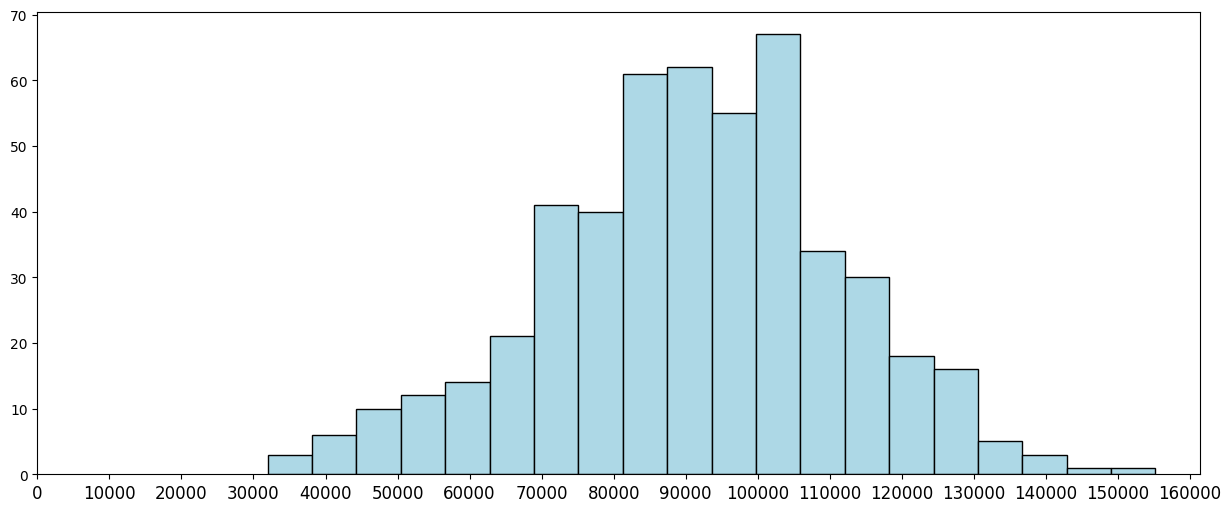

In [ ]:
plt.figure(figsize=(15, 6))
plt.hist(df['Salary_USD'], bins=20, color="lightblue", edgecolor='black' )
plt.xticks(ticks=np.arange(0, df["Salary_USD"].max()+10000, step=10000), fontsize=12)
plt.show()

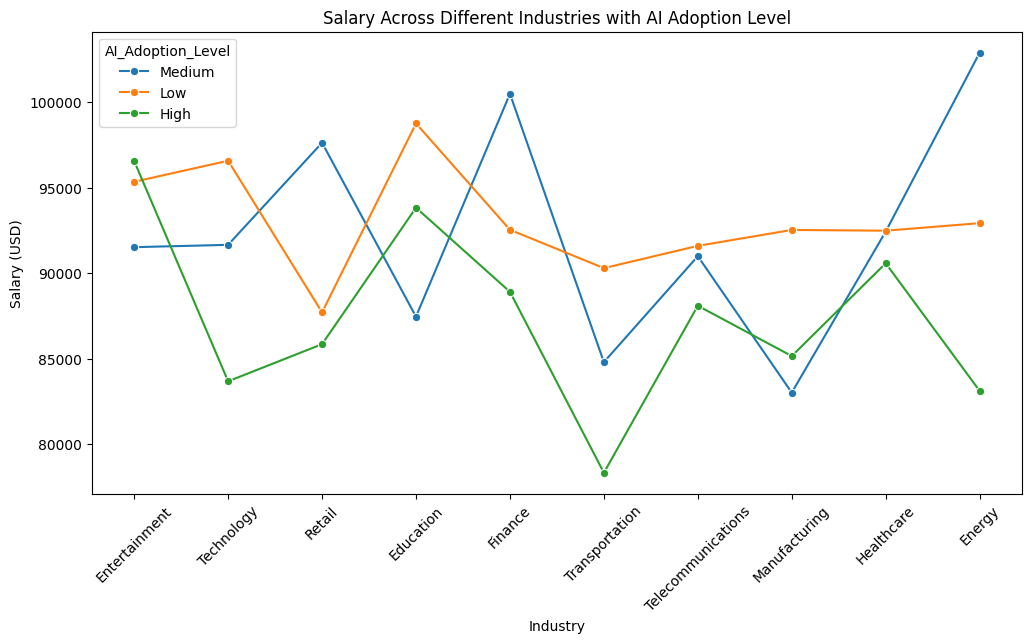

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Industry', y='Salary_USD', hue='AI_Adoption_Level', marker='o' , ci=None)
plt.title('Salary Across Different Industries with AI Adoption Level')
plt.xlabel('Industry')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.show()

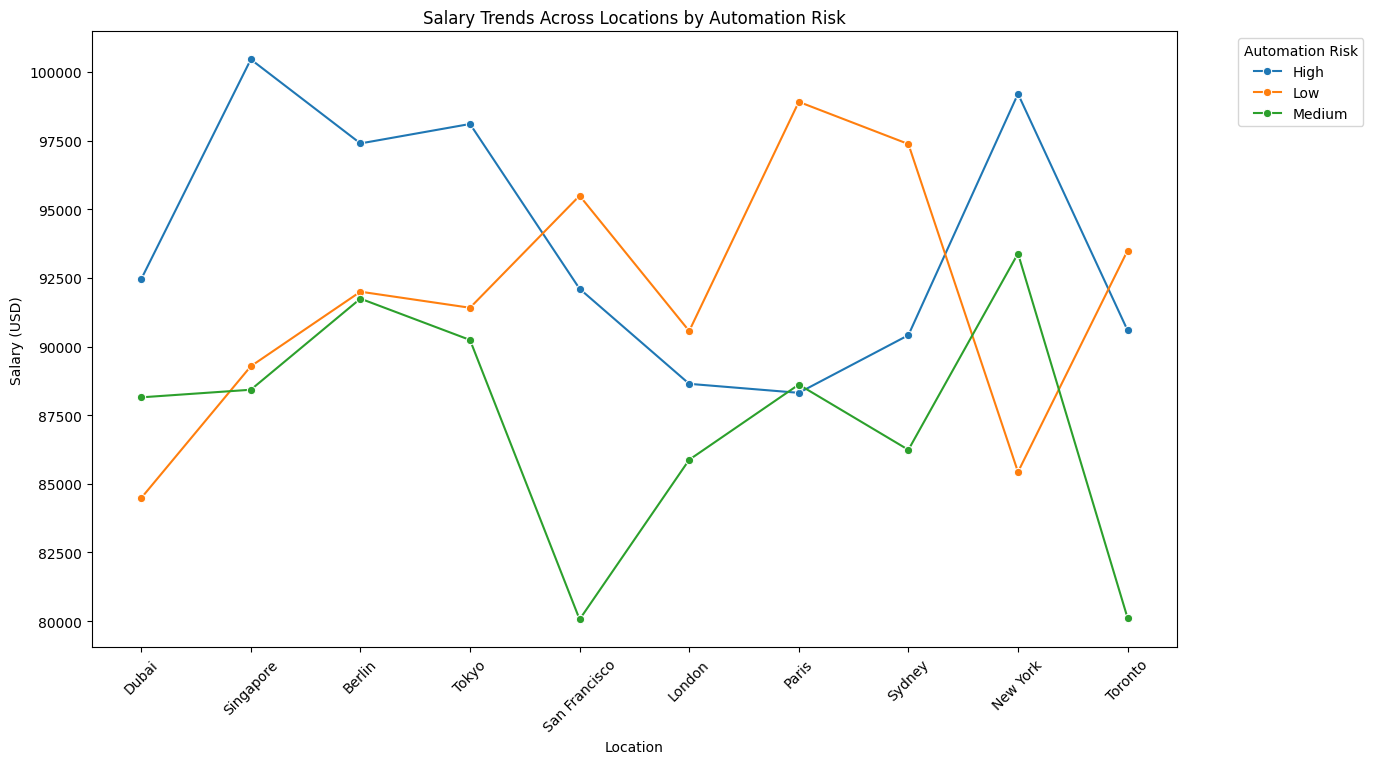

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Location', y='Salary_USD', hue='Automation_Risk', marker='o', ci=None)
plt.title('Salary Trends Across Locations by Automation Risk')
plt.xlabel('Location')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.legend(title='Automation Risk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

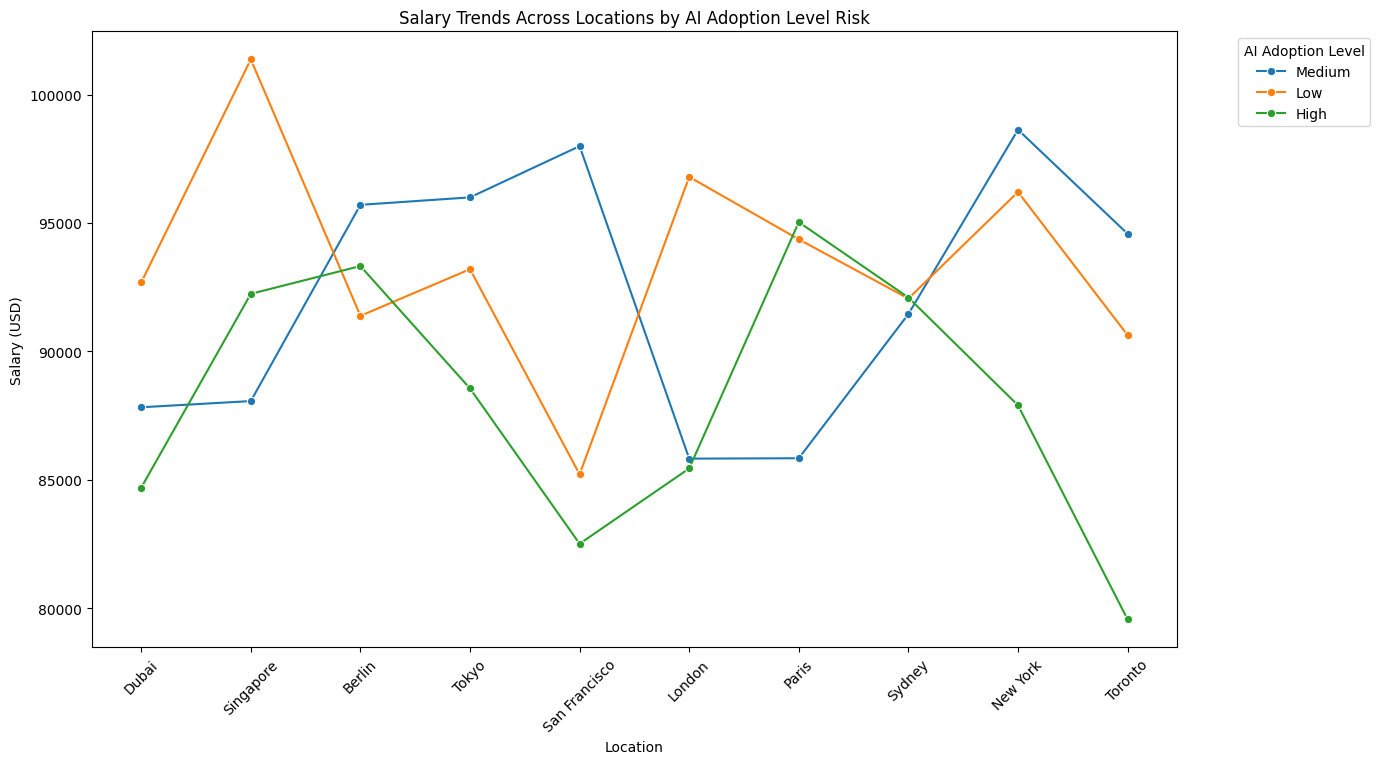

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Location', y='Salary_USD', hue='AI_Adoption_Level', marker='o', ci=None)
plt.title('Salary Trends Across Locations by AI Adoption Level Risk')
plt.xlabel('Location')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.legend(title='AI Adoption Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

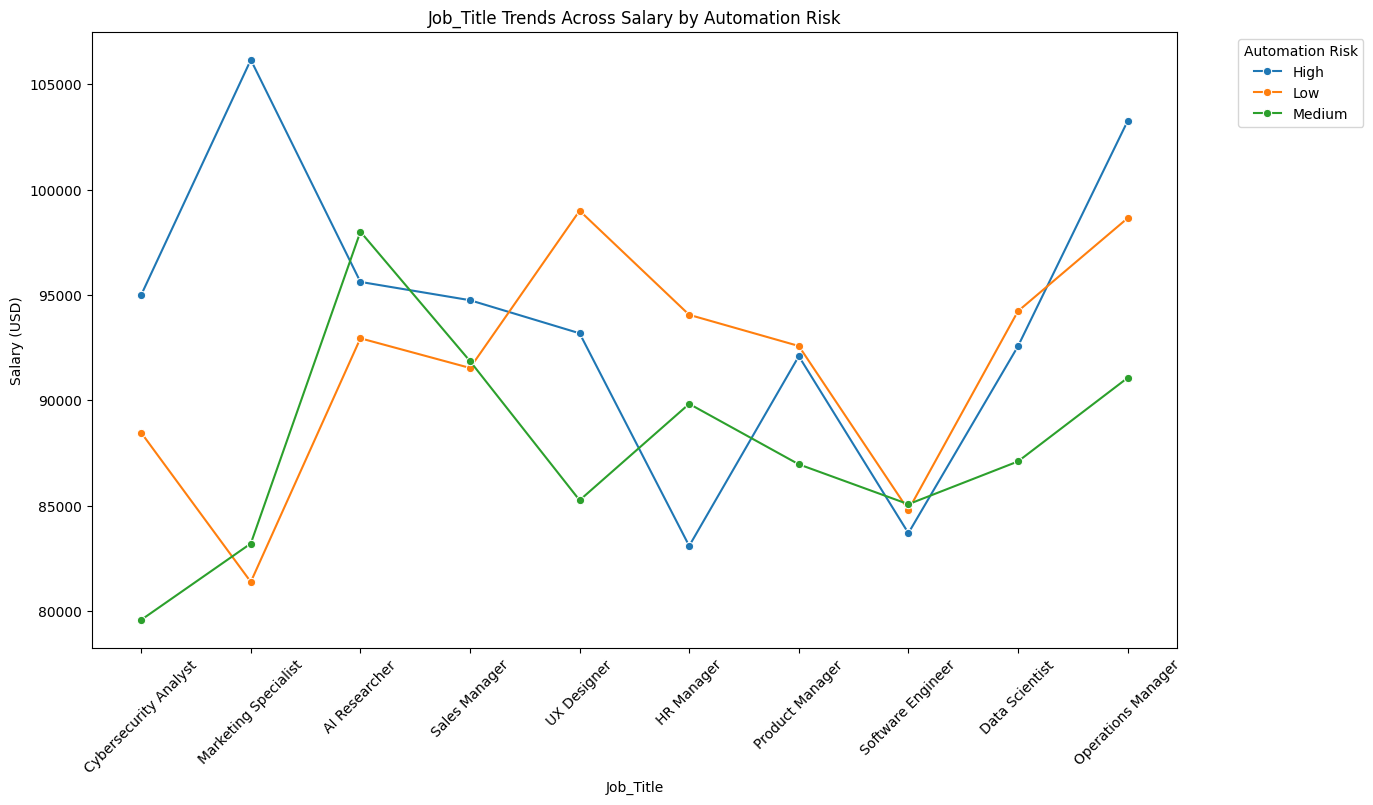

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='Job_Title', y='Salary_USD', hue='Automation_Risk', marker='o', ci=None)
plt.title('Job_Title Trends Across Salary by Automation Risk')
plt.xlabel('Job_Title')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=45)
plt.legend(title='Automation Risk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
df.Remote_Friendly.unique()


array(['Yes', 'No'], dtype=object)

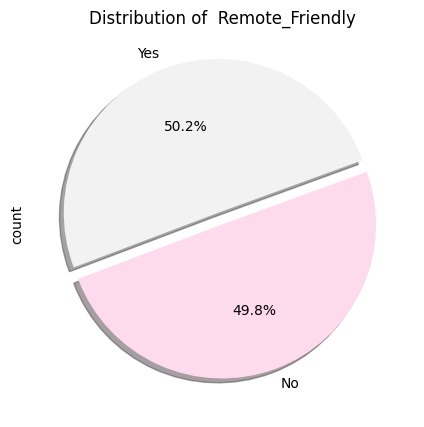

In [ ]:
colors = plt.get_cmap('Pastel1_r').colors
df["Remote_Friendly"].value_counts().plot(kind='pie', startangle=20 ,autopct='%1.1f%%', figsize=(5,5), title='Distribution of  Remote_Friendly', explode=(0.08,0 ) , shadow=True , colors=colors)
plt.show()


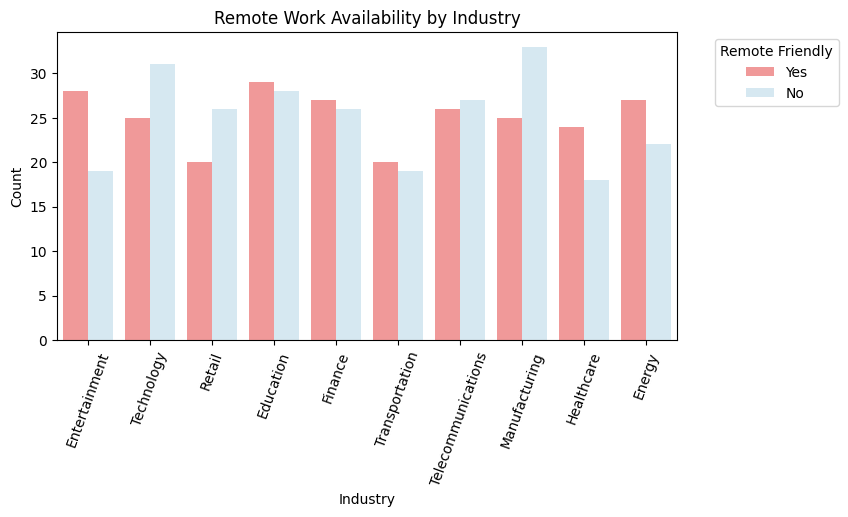

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Industry', hue='Remote_Friendly', palette={"#FF8A8A" ,"#D1E9F6"})
plt.title('Remote Work Availability by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.xticks(rotation=70)
plt.legend(title='Remote Friendly', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

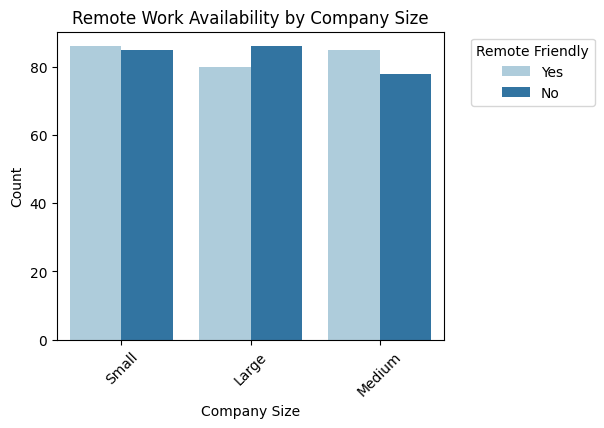

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Company_Size', hue='Remote_Friendly', palette='Paired')
plt.title('Remote Work Availability by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Remote Friendly', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


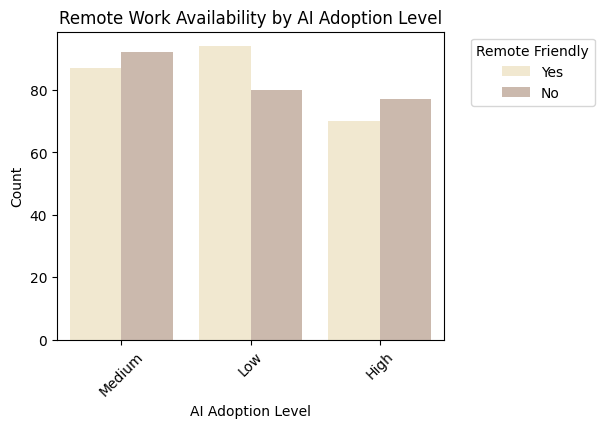

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='AI_Adoption_Level', hue='Remote_Friendly', palette={"#F6EACB" ,"#D0B8A8"})
plt.title('Remote Work Availability by AI Adoption Level')
plt.xlabel('AI Adoption Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Remote Friendly', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

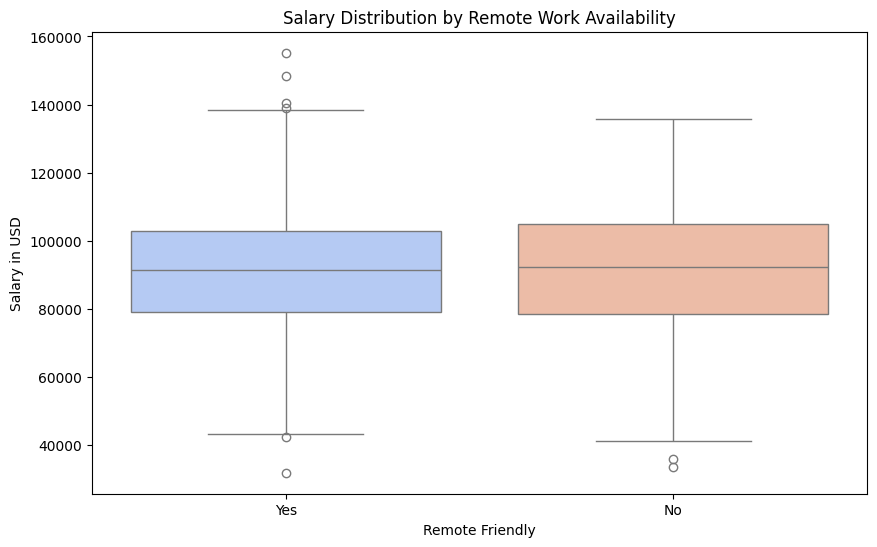

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Remote_Friendly', y='Salary_USD', palette='coolwarm')
plt.title('Salary Distribution by Remote Work Availability')
plt.xlabel('Remote Friendly')
plt.ylabel('Salary in USD')
plt.show()

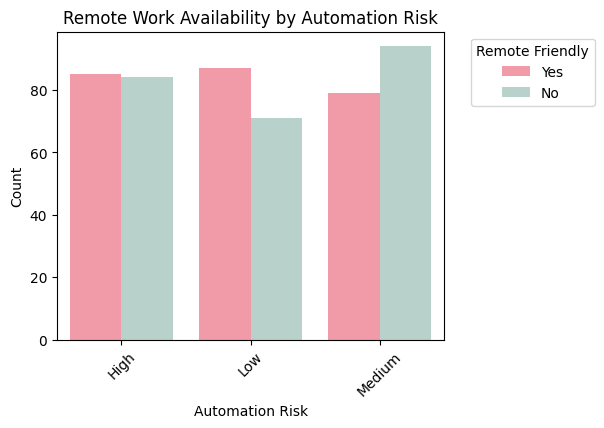

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Automation_Risk', hue='Remote_Friendly', palette={"#FF8C9E" ,"#B4D6CD"})
plt.title('Remote Work Availability by Automation Risk')
plt.xlabel('Automation Risk')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Remote Friendly', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:

df.Job_Growth_Projection.unique()


array(['Growth', 'Decline', 'Stable'], dtype=object)

In [ ]:
df.Job_Growth_Projection.value_counts()


,count
Job_Growth_Projection,
Growth,169
Decline,169
Stable,162


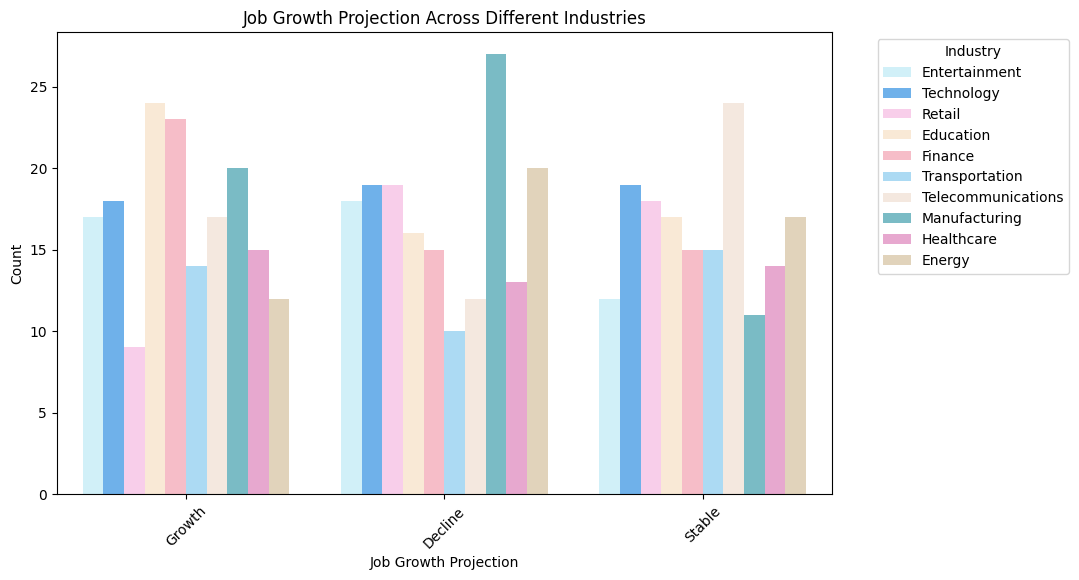

In [ ]:
colors = ["#CAF4FF", "#5AB2FF","#FFC7ED" ,"#FFE9D0" ,"#FFB4C2","#A0DEFF" ,"#F7E7DC" ,"#6DC5D1" ,"#F19ED2","#E7D4B5"]

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Job_Growth_Projection', hue='Industry', palette=colors)
plt.title('Job Growth Projection Across Different Industries')
plt.xlabel('Job Growth Projection')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

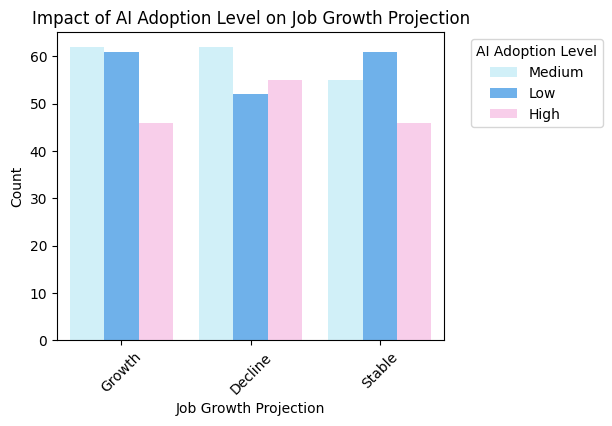

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Job_Growth_Projection', hue='AI_Adoption_Level', palette=["#CAF4FF", "#5AB2FF","#FFC7ED"])
plt.title('Impact of AI Adoption Level on Job Growth Projection')
plt.xlabel('Job Growth Projection')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='AI Adoption Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

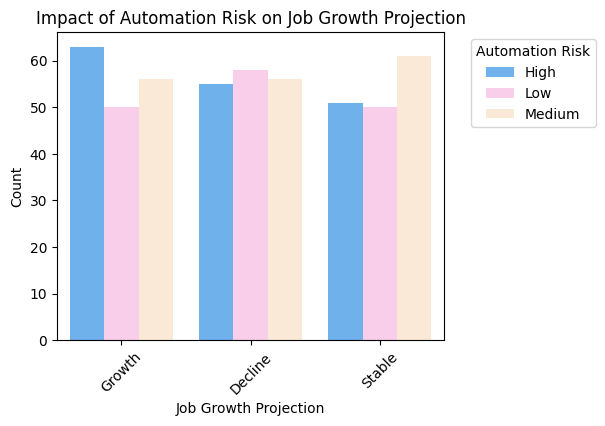

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Job_Growth_Projection', hue='Automation_Risk', palette=["#5AB2FF","#FFC7ED" ,"#FFE9D0"])
plt.title('Impact of Automation Risk on Job Growth Projection')
plt.xlabel('Job Growth Projection')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Automation Risk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

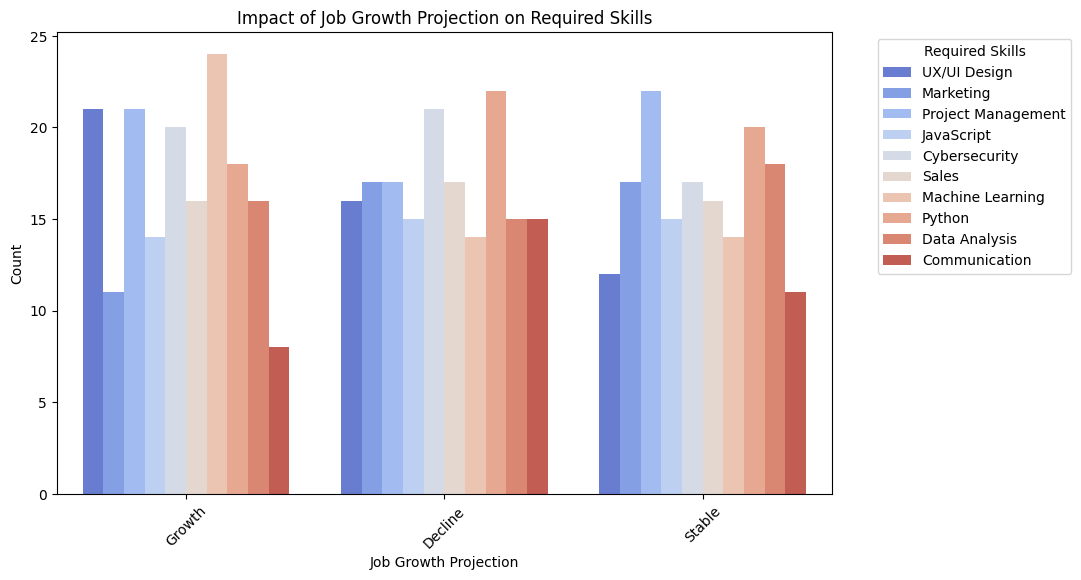

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Job_Growth_Projection', hue='Required_Skills', palette='coolwarm')
plt.title('Impact of Job Growth Projection on Required Skills')
plt.xlabel('Job Growth Projection')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Required Skills', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

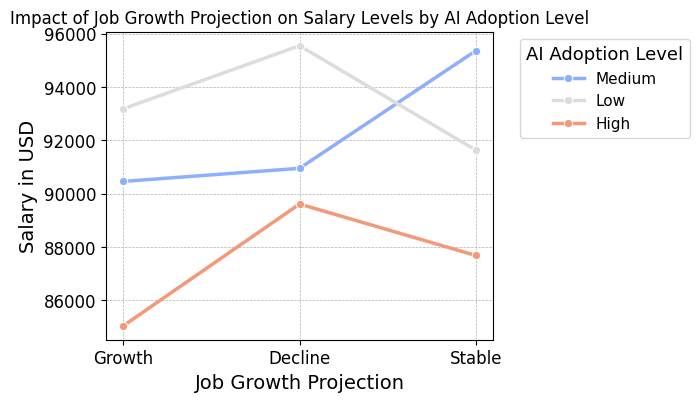

In [ ]:
plt.figure(figsize=(5, 4))
sns.lineplot(data=df, x='Job_Growth_Projection', y='Salary_USD', hue='AI_Adoption_Level',
             marker='o', palette='coolwarm', ci=None, linewidth=2.5)

plt.title('Impact of Job Growth Projection on Salary Levels by AI Adoption Level', fontsize=12)
plt.xlabel('Job Growth Projection', fontsize=14)
plt.ylabel('Salary in USD', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='AI Adoption Level', title_fontsize='13', fontsize='11', loc='upper left',  bbox_to_anchor=(1.05, 1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


In [ ]:
df.shape

(500, 10)

In [ ]:
df

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
...,...,...,...,...,...,...,...,...,...,...
495,Data Scientist,Telecommunications,Medium,Berlin,Low,Medium,Machine Learning,105821.394046,Yes,Stable
496,Cybersecurity Analyst,Telecommunications,Small,London,Low,High,UX/UI Design,119794.992146,No,Decline
497,Cybersecurity Analyst,Energy,Large,Dubai,High,Low,UX/UI Design,79644.933099,Yes,Stable
498,Operations Manager,Healthcare,Large,Paris,High,Low,Python,77642.150625,Yes,Stable
